In [56]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
files = [
    "lr_0.0001_adam_bs1024.txt", "lr_0.001_adam_bs1024.txt", "lr_0.005_adam_bs1024.txt", "lr_0.01_adam_bs1024.txt", 
    "lr_0.05_adam_bs1024.txt", "lr_0.5_adam_bs1024.txt", 'adadelta.txt']

ACC = "Accuracy: "
TIME = ": time="
ENERGY = ", energy="
THRESHOLD = 0.6

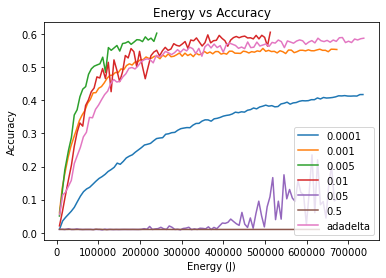

In [58]:
energy_time_06 = []
# recorded = set()
accuracies = {}
times = {}
energy_consumption = {}
for file in files:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
#                 if accuracy >= THRESHOLD and file not in recorded:
#                     energy_time_06.append((energy, time, file))
#                     recorded.add(file)
            line = f.readline()
    accuracies[file] = acc
    times[file] = time
    energy_consumption[file] = energy_cons
    lr = file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(energy_cons, acc, label=lr)

plt.xlabel("Energy (J)")
plt.ylabel("Accuracy")
plt.title("Energy vs Accuracy")
plt.legend(loc='best')
plt.show()

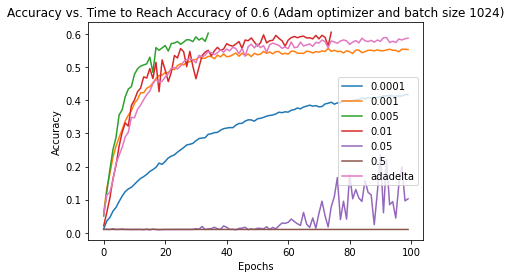

In [59]:
for file in files:
    accuracy = accuracies[file]
    epochs = range(len(accuracy))
    lr = file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(epochs, accuracy, label=lr)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Time to Reach Accuracy of 0.6 (Adam optimizer and batch size 1024)')
plt.legend(loc='right')
plt.show()

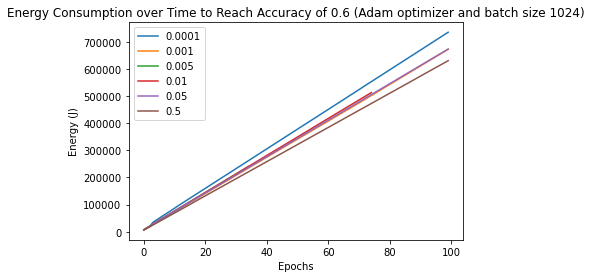

In [5]:
for file in files:
    energy = energy_consumption[file]
#     print(f'{file}: {len(energy)}')
    epochs = range(len(energy))
    lr = file.split('_')[1]
    plt.plot(epochs, energy, label=lr)
plt.xlabel('Epochs')
plt.ylabel('Energy (J)')
plt.title('Energy Consumption over Time to Reach Accuracy of 0.6 (Adam optimizer and batch size 1024)')
plt.legend()
plt.show()

In [60]:
from analyze import HistoryEntry

In [7]:
history = eval(open('history.py').read())

In [61]:
adadelta_history = eval(open('history_adadelta.py').read())

In [14]:
history

[HistoryEntry(bs=1024, pl=None, lr=0.0001, energy=735181.4526552451, reached=False, time=4928.229457993996),
 HistoryEntry(bs=1024, pl=None, lr=0.001, energy=672462.2731224052, reached=False, time=4806.314337210996),
 HistoryEntry(bs=1024, pl=175.0, lr=0.005, energy=240343.41170650077, reached=True, time=1745.0100623509989),
 HistoryEntry(bs=1024, pl=175.0, lr=0.01, energy=512864.726165234, reached=True, time=3675.9740900210018),
 HistoryEntry(bs=1024, pl=150.0, lr=0.05, energy=673308.1082976655, reached=False, time=4862.071877154984),
 HistoryEntry(bs=1024, pl=150.0, lr=0.5, energy=630375.3421898179, reached=False, time=4775.313635210998)]

In [19]:
def convert_HistoryEntry_to_dict(h_entry):
    dict = {
        'batch_size': h_entry.bs,
        'learning_rate': h_entry.lr,
        'power_limit': h_entry.pl, 
        'energy': h_entry.energy, 
        'time': h_entry.time, 
        'reached': h_entry.reached
    }
    return dict

In [20]:
history_list = [convert_HistoryEntry_to_dict(he) for he in history]
history_df = pd.DataFrame(history_list)

In [21]:
history_df

,batch_size,learning_rate,power_limit,energy,time,reached
0,1024,0.0001,NaN,735181.452655,4928.229458,False
1,1024,0.0010,NaN,672462.273122,4806.314337,False
2,1024,0.0050,175.0,240343.411707,1745.010062,True
3,1024,0.0100,175.0,512864.726165,3675.974090,True
4,1024,0.0500,150.0,673308.108298,4862.071877,False
5,1024,0.5000,150.0,630375.342190,4775.313635,False


In [68]:
adadelta_hist = pd.DataFrame([convert_HistoryEntry_to_dict(he) for he in adadelta_history])

TypeError: Cannot index by location index with a non-integer key

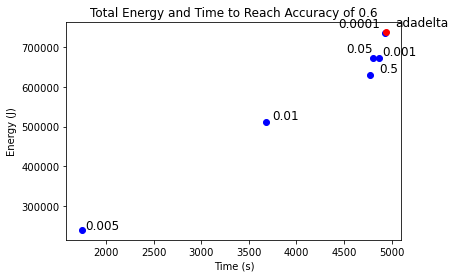

In [76]:
# plt.scatter(history_df['time'], history_df['energy'])
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot 
for row in history_df.iterrows():
    time = row[1]['time']
    energy = row[1]['energy']
    lr = row[1]['learning_rate']
    plt.plot(time, energy, 'bo')
    if lr != 0.05 and lr != 0.0001:
        plt.text(time * 1.02, energy * 1.01, lr, fontsize=12)
    elif lr == 0.0001:
        plt.text(time * 0.9, energy * 1.02, lr, fontsize=12)
    else:
        plt.text(time * 0.93, energy * 1.02, lr, fontsize=12)

for row in adadelta_hist.iterrows():
    time = row[1]['time']
    energy = row[1]['energy']
    plt.plot(time, energy, 'ro')
    plt.text(time * 1.02, energy * 1.02, 'adadelta', fontsize=12)

plt.title('Total Energy and Time to Reach Accuracy of 0.6')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.show()

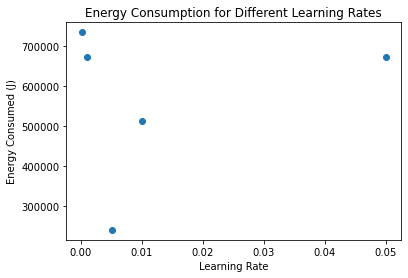

In [55]:
modified_df = history_df[history_df['learning_rate'] < 0.5]
plt.scatter(modified_df['learning_rate'], modified_df['energy'])
plt.title('Energy Consumption for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Energy Consumed (J)')
plt.show()

No handles with labels found to put in legend.


[]


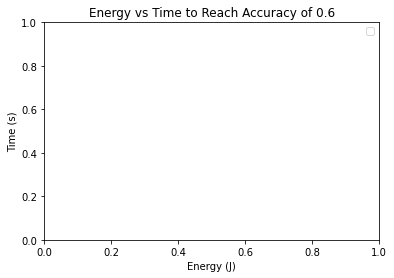

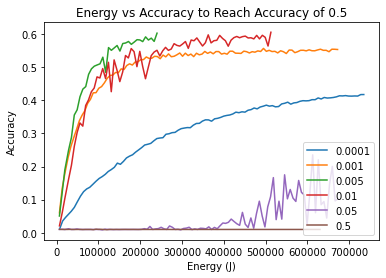

In [29]:
THRESHOLD = 0.5
energy_time_05 = []
recorded = set()
accuracies = {}
times = {}
energy_consumption = {}
for file in files:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
                if accuracy >= THRESHOLD and file not in recorded:
                    energy_time_05.append((energy, time, file))
                    recorded.add(file)
            line = f.readline()
    accuracies[file] = acc
    times[file] = time
    energy_consumption[file] = energy_cons
    lr = file.split('_')[1]
    plt.plot(energy_cons, acc, label=lr)

plt.xlabel("Energy (J)")
plt.ylabel("Accuracy")
plt.title(f"Energy vs Accuracy to Reach Accuracy of {THRESHOLD}")
plt.legend(loc='best')
plt.show()

ValueError: x and y must be the same size

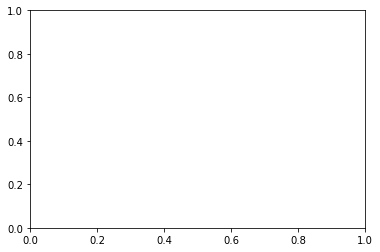

In [31]:
energies = [elem[0] for elem in energy_time_05]
times = [elem[1] for elem in energy_time_05]
names = [elem[2] for elem in energy_time_05]

# print(energy_time_06)
for i in range(len(times)):
    plt.scatter(energies[i], times[i], label=names[i])

plt.xlabel("Energy (J)")
plt.ylabel("Time (s)")
plt.title(f"Energy vs Time to Reach Accuracy of {THRESHOLD}")
plt.legend()
plt.show()

In [30]:
energy_time_05

[(174552.93,
  [50.41,
   98.03,
   149.39,
   232.61,
   279.75,
   326.95,
   374.2,
   421.56,
   468.86,
   516.11,
   563.4,
   610.6,
   657.85,
   705.09,
   752.41,
   799.77,
   847.17,
   894.46,
   941.88,
   989.13,
   1036.54,
   1084.49,
   1132.59,
   1180.17,
   1227.47,
   1274.65,
   1321.92,
   1369.27,
   1416.6,
   1463.92,
   1511.22,
   1558.52,
   1605.82,
   1653.11,
   1700.53,
   1747.89,
   1795.21,
   1842.54,
   1889.81,
   1937.07,
   1984.35,
   2032.11,
   2080.06,
   2127.92,
   2175.27,
   2222.5,
   2269.71,
   2316.96,
   2364.26,
   2411.48,
   2458.77,
   2506.03,
   2553.35,
   2600.7,
   2647.96,
   2695.29,
   2742.6,
   2789.86,
   2837.09,
   2884.45,
   2931.74,
   2978.9,
   3026.15,
   3073.4,
   3120.63,
   3167.89,
   3215.17,
   3262.45,
   3309.73,
   3357.05,
   3404.36,
   3452.34,
   3500.36,
   3548.23,
   3596.66,
   3645.43,
   3693.57,
   3742.38,
   3790.75,
   3839.48,
   3887.91,
   3936.71,
   3984.83,
   4033.61,
   4081.67